# Determinar la nota final de los estudiantes

En principio se intentaba determinar la nota dependiendo únicamente de las características sociales.
Tras el estudio se vió que salvo unas características muy específicas la correlacionalidad no era lo suficientemente fuerte para determinar la nota, por lo que se integró la nota de escritura y lectura para poder determinar la de matemáticas por su fuerte correlación. Se estudian modelos de árboles de decisión y modelos lineales para determinar cual es el modelo más óptimo. Cuando se utilizaban los datos únicamente sociales se veía una fuerte linealidad en los datos por lo que se entiende que seguramente un modelo lineal será el más adecuado para este tipo de datos.

OBTENER LOS DATOS:

* El dataset que estoy utilizando pertenece a Kaggle y permite su uso, por lo que no necesito de ningún permiso adicional.

In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ruta Github
url="https://raw.githubusercontent.com/Aiadevop/math_student_grade/refs/heads/main/data/raw/StudentsPerformance.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# Obtengo la información básica del dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Resumen estadístico:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# Estudio las variables categóricas para transformarlas a numéricas
# Lista de columnas categóricas
categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

# Mostrar los valores únicos de cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())



gender:
['female' 'male']

race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:
['standard' 'free/reduced']

test preparation course:
['none' 'completed']


In [6]:
df_rg = df.copy()

# 1. Limpiar nombres de columnas
df_rg.columns = (
    df_rg.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("'", "", regex=False)
    .str.replace("/", "_", regex=False)
)

# 2. Limpiar valores en celdas de tipo string
df_rg = df_rg.apply(lambda col: col.map(lambda x: x.strip().replace("'", "").replace(" ", "_") if isinstance(x, str) else x))

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df_num = df_rg.copy()

# -----------------------------
# 1️⃣ Label Encoding para binarias
# -----------------------------
label_encoders = {
    'gender': {'female': 0, 'male': 1},
    'lunch': {'free/reduced': 0, 'standard': 1},
    'test_preparation_course': {'none': 0, 'completed': 1}
}

for col, mapping in label_encoders.items():
    df_num[col] = df_num[col].map(mapping)

# -----------------------------
# 2️⃣ One-Hot Encoding para variables multiclase
# -----------------------------
ohe_cols = ['race_ethnicity', 'parental_level_of_education']
ohe = OneHotEncoder(drop='first', sparse_output=False) # drop='first' evita multicolinealidad

ohe_result = ohe.fit_transform(df_num[ohe_cols])
ohe_df = pd.DataFrame(
    ohe_result,
    columns=ohe.get_feature_names_out(ohe_cols),
    index=df_num.index
)

# -----------------------------
# 3️⃣ Unir al DataFrame original y eliminar columnas originales
# -----------------------------
df_num = df_num.drop(columns=ohe_cols)
df_num = pd.concat([df_num, ohe_df], axis=1)

# -----------------------------
# 4️⃣ Reordenar las columnas por nivel de estudios.
# -----------------------------

edu_order = [
    "parental_level_of_education_some_high_school",
    "parental_level_of_education_high_school",
    "parental_level_of_education_some_college",
    "parental_level_of_education_bachelors_degree",
    "parental_level_of_education_masters_degree"
]

df_num = df_num[edu_order + [col for col in df_num.columns if col not in edu_order]]

In [8]:
df_num.head()

,parental_level_of_education_some_high_school,parental_level_of_education_high_school,parental_level_of_education_some_college,parental_level_of_education_bachelors_degree,parental_level_of_education_masters_degree,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E
0,0.0,0.0,0.0,1.0,0.0,0,1,0,72,72,74,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0,1,1,69,90,88,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0,1,0,90,95,93,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1,0,0,47,57,44,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1,1,0,76,78,75,0.0,1.0,0.0,0.0


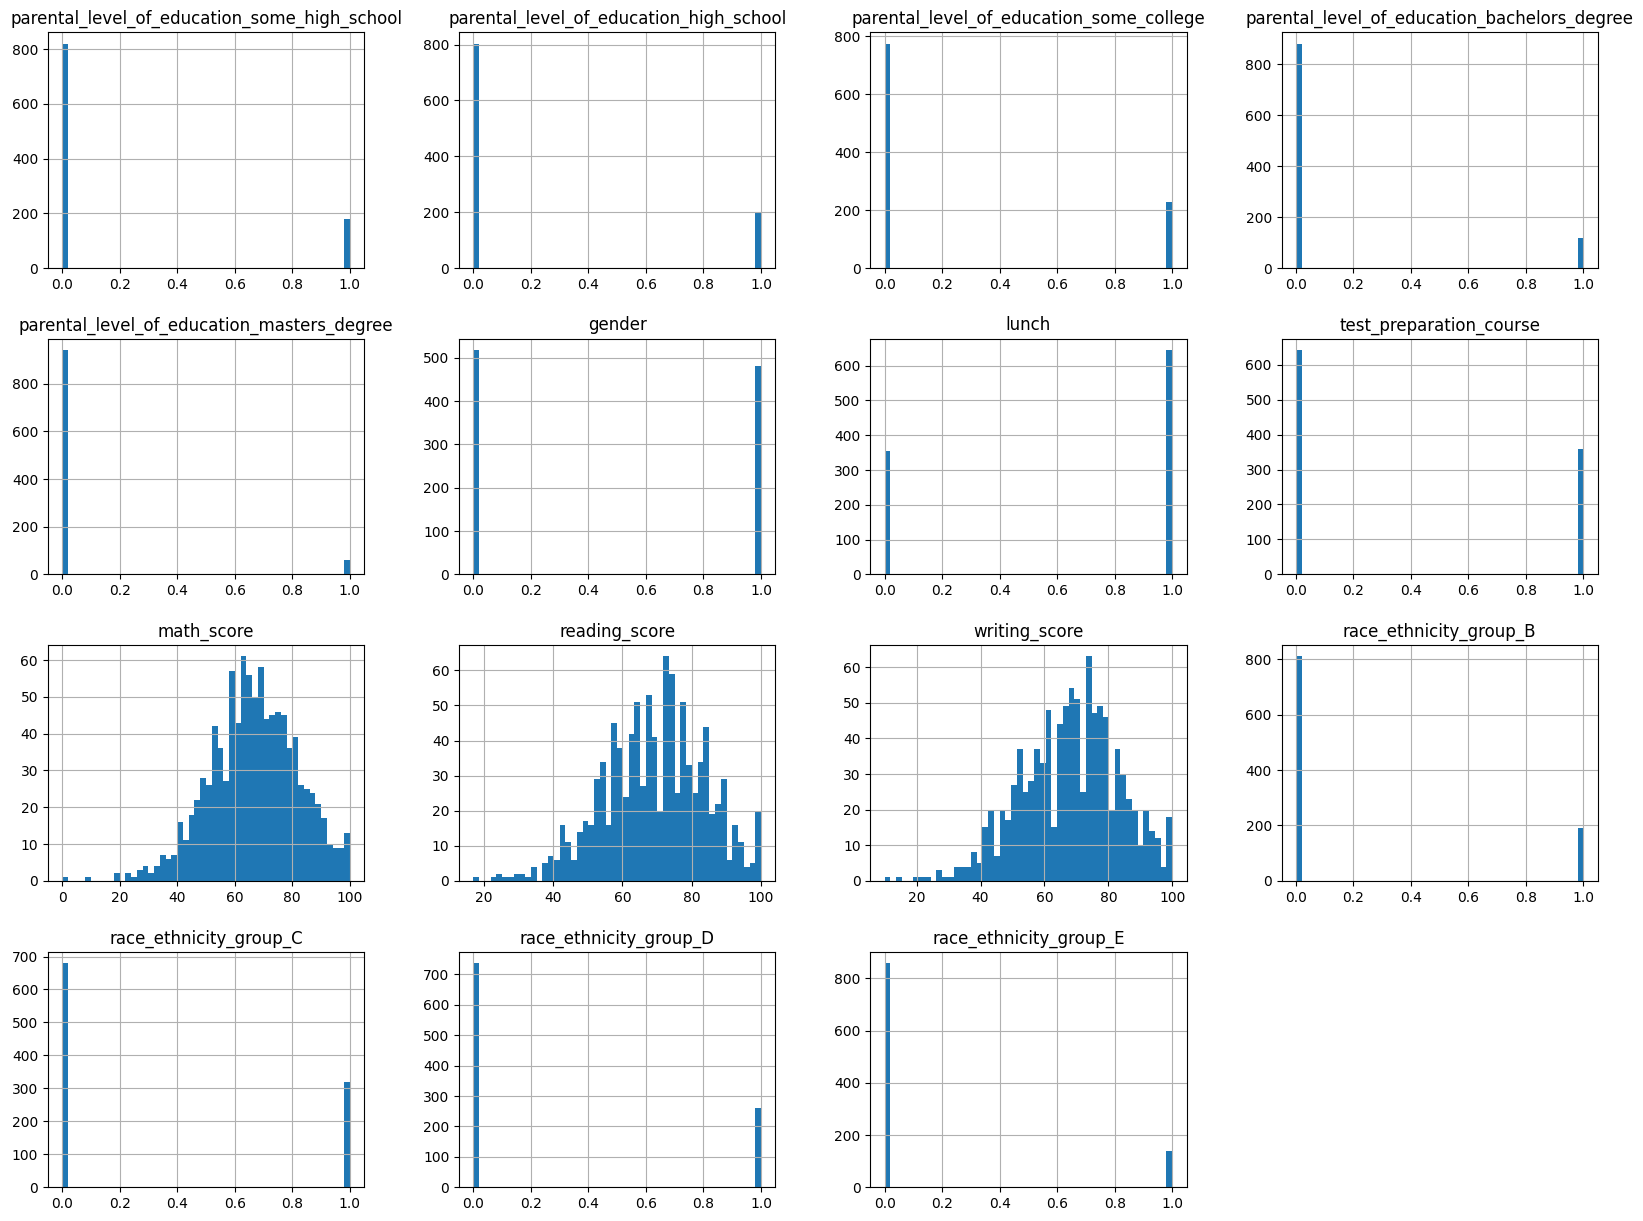

In [9]:
# sacamos las gráficas de cada feature
import matplotlib.pyplot as plt

df_num.hist(bins=50, figsize=(20,15))
plt.show()

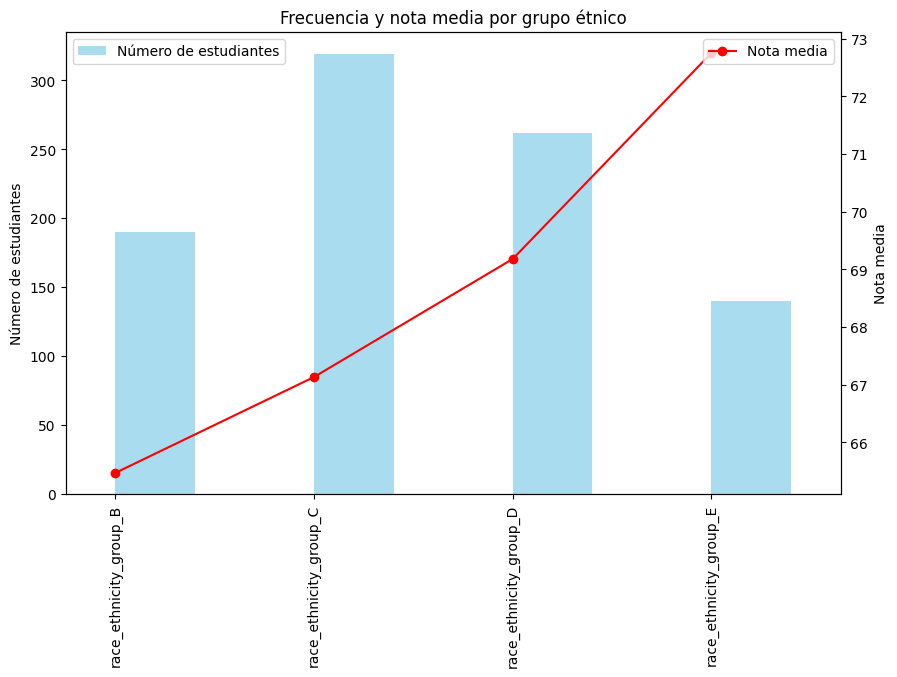

In [10]:
import matplotlib.pyplot as plt

ethnicity_cols = [
    "race_ethnicity_group_B", "race_ethnicity_group_C",
    "race_ethnicity_group_D", "race_ethnicity_group_E"
]

# --- Frecuencia de estudiantes por grupo ---
counts = df_num[ethnicity_cols].sum()

# --- Nota media por grupo (ejemplo con math_score, reading_score y writing_score) ---
mean_scores = {}
for col in ethnicity_cols:
    mask = df_num[col] == 1
    mean_scores[col] = df_num.loc[mask, ["math_score", "reading_score", "writing_score"]].mean().mean()

mean_scores = pd.Series(mean_scores)

# --- Gráfico combinado ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras = número de estudiantes
counts.plot(kind="bar", ax=ax1, color="skyblue", alpha=0.7, position=0, width=0.4, label="Número de estudiantes")

# Eje secundario para las notas
ax2 = ax1.twinx()
mean_scores.plot(kind="line", ax=ax2, color="red", marker="o", label="Nota media")

# Títulos y etiquetas
ax1.set_title("Frecuencia y nota media por grupo étnico")
ax1.set_ylabel("Número de estudiantes")
ax2.set_ylabel("Nota media")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

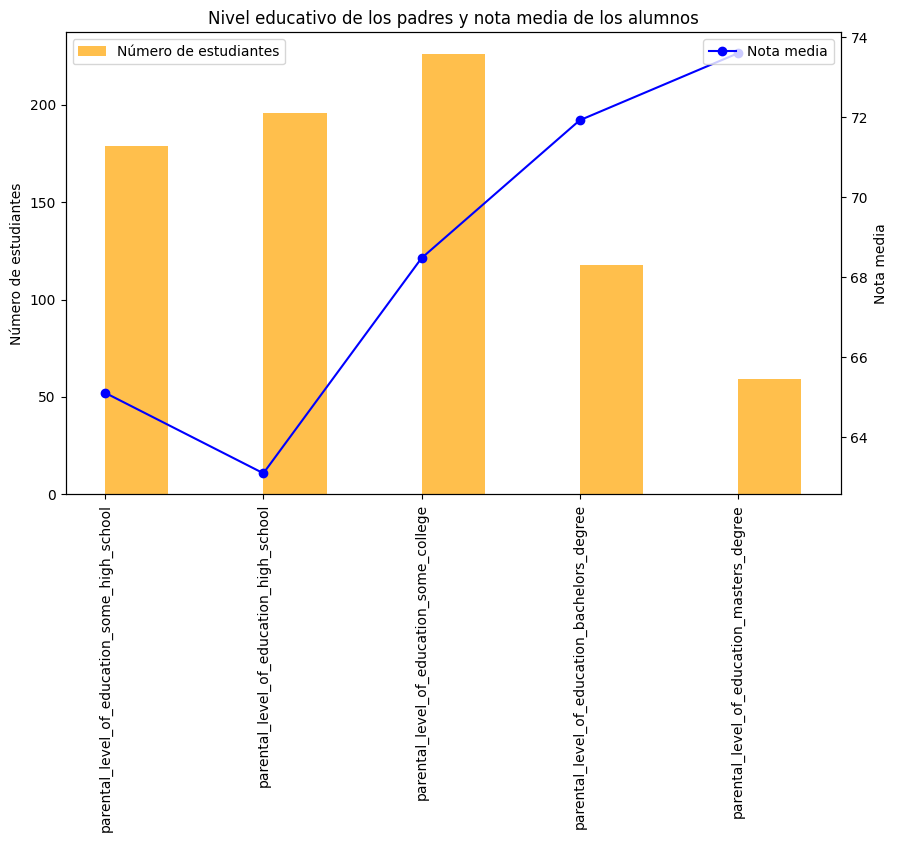

In [11]:
import matplotlib.pyplot as plt

edu_cols = [
    "parental_level_of_education_some_high_school",
    "parental_level_of_education_high_school",
    "parental_level_of_education_some_college",
    "parental_level_of_education_bachelors_degree",
    "parental_level_of_education_masters_degree"
]

# --- Frecuencia de estudiantes por nivel educativo ---
counts = df_num[edu_cols].sum()

# --- Nota media por nivel educativo (promedio de math, reading y writing) ---
mean_scores = {}
for col in edu_cols:
    mask = df_num[col] == 1
    mean_scores[col] = df_num.loc[mask, ["math_score", "reading_score", "writing_score"]].mean().mean()

mean_scores = pd.Series(mean_scores)

# --- Gráfico combinado ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras = número de estudiantes
counts.plot(kind="bar", ax=ax1, color="orange", alpha=0.7, position=0, width=0.4, label="Número de estudiantes")

# Eje secundario para las notas
ax2 = ax1.twinx()
mean_scores.plot(kind="line", ax=ax2, color="blue", marker="o", label="Nota media")

# Títulos y etiquetas
ax1.set_title("Nivel educativo de los padres y nota media de los alumnos")
ax1.set_ylabel("Número de estudiantes")
ax2.set_ylabel("Nota media")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


- De estas gráficas se deduce que:
  * La distribución de genero es bastante igualitaria.
  * Hay casi el doble de alumnos con almuerzo regular que con almuerzo reducido.
  * Mayoría de los alumnos no prepararon el test inicial
  * Hay una etnia fuertemente predominante la C y una etnia mucho menos predominante E, pero que obtiene la mayor nota media, la del B la que menor nota media obtiene.
  * Hay menor número de padres cuanto más alto es el nivel de estudios, pero se obtiene mejor nota a medida que ascienden los estudios de los padres.  

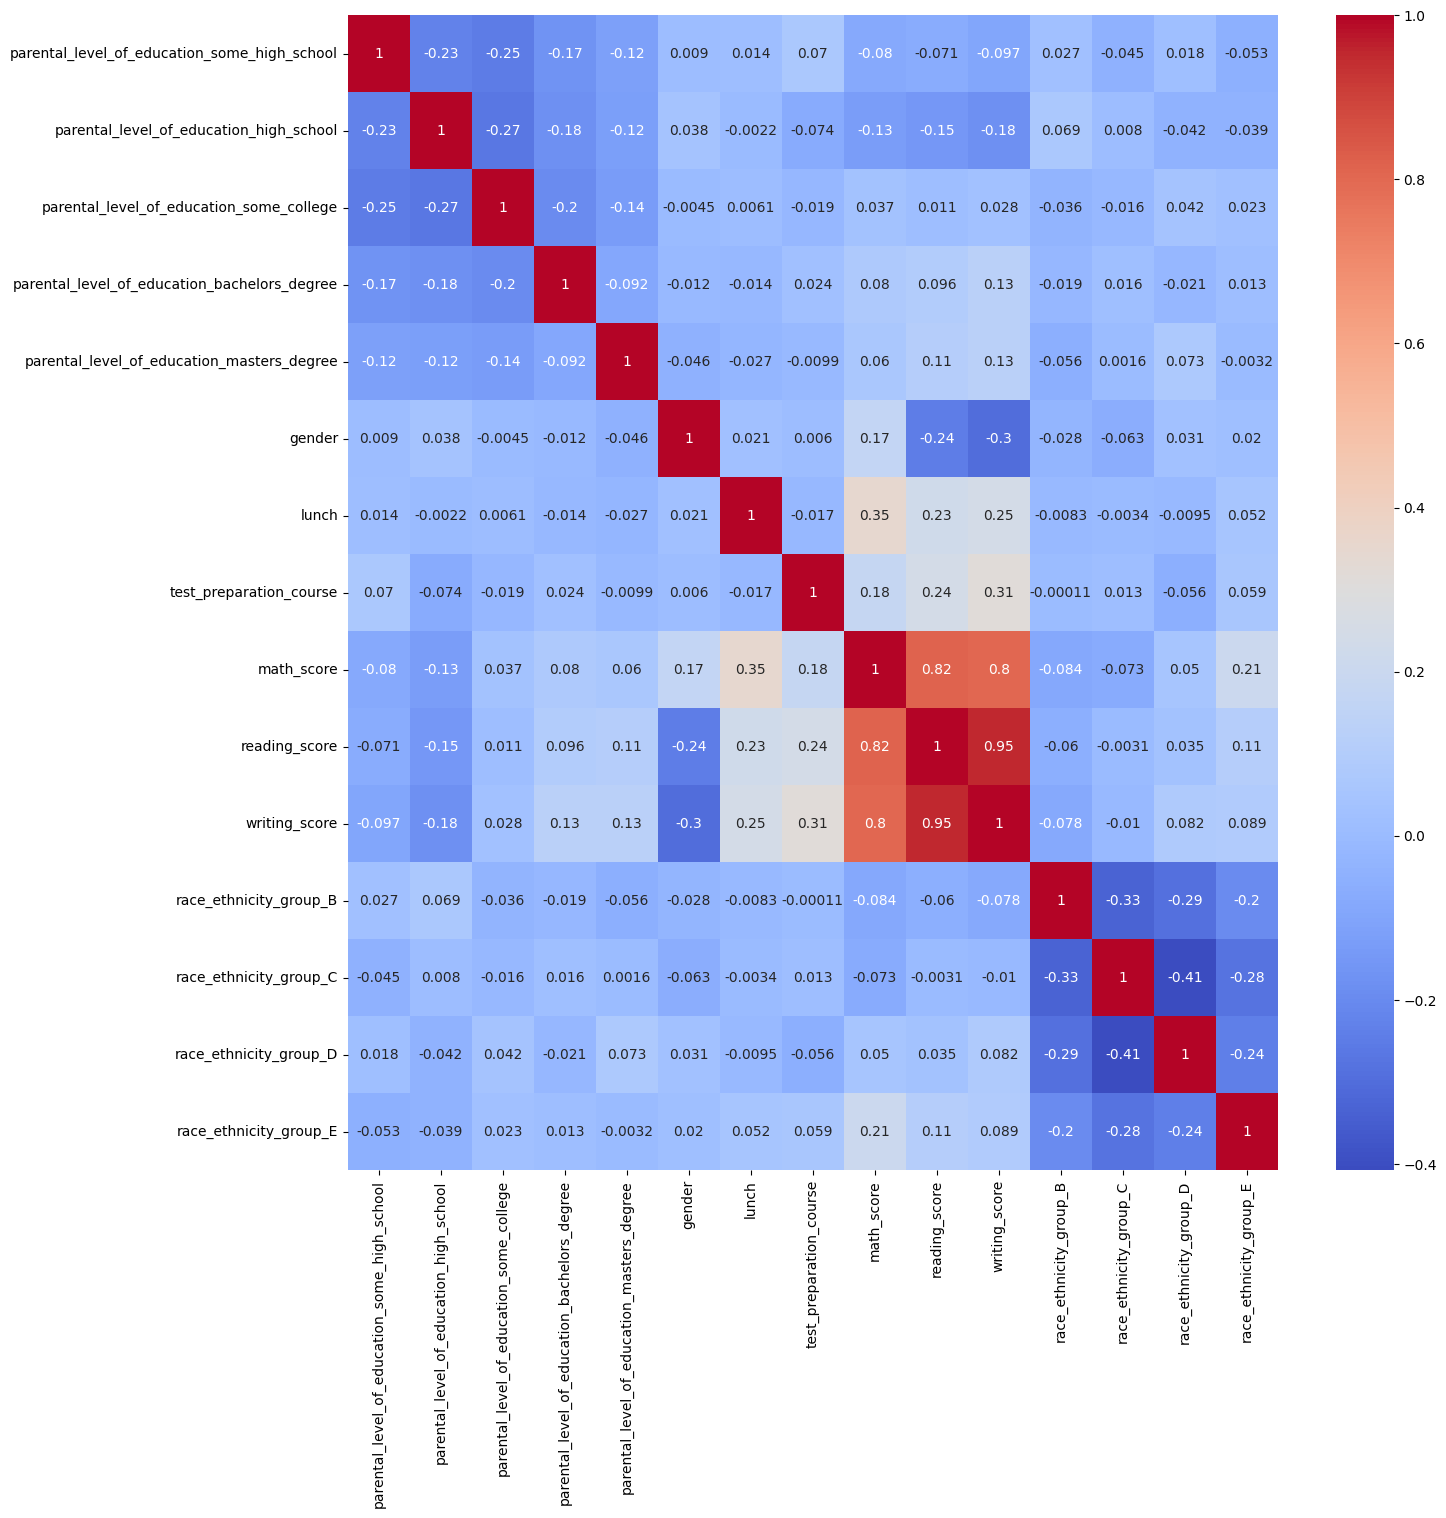

In [12]:
# Mapa de calor.
co_mx= df_num.corr()
# print(co_mx)
plt.figure(figsize= (15,15))
sns.heatmap(co_mx, annot=True , cmap = 'coolwarm')
plt.show()

In [13]:
# 1️⃣ Correlación de todas las variables con math_score
corr_target = df_num.corr()['math_score'].sort_values(ascending=False)

# Vemos correlaciones con math_score
print(corr_target)

# 2️⃣ Fijamos un umbral para considerar "variables relevantes"
#    (ejemplo: |corr| > 0.1, tú puedes ajustar el valor)
umbral = 0.1
features_relevantes = corr_target[abs(corr_target) > umbral].index.tolist()

# Nos aseguramos de incluir math_score (target)
if 'math_score' not in features_relevantes:
    features_relevantes.append('math_score')

# 3️⃣ DataFrame para regresión lineal (solo features relevantes)
df_linear = df_num[features_relevantes].copy()

# 4️⃣ DataFrame para árboles (todas las features, no filtramos nada)
df_tree = df_num.copy()

# 5️⃣ Guardamos los dos dataframes
print("📊 DataFrame para regresión lineal:")
display(df_linear.head())

print("\n🌳 DataFrame para árboles:")
display(df_tree.head())


math_score                                      1.000000
reading_score                                   0.817580
writing_score                                   0.802642
lunch                                           0.350877
race_ethnicity_group_E                          0.205855
test_preparation_course                         0.177702
gender                                          0.167982
parental_level_of_education_bachelors_degree    0.079664
parental_level_of_education_masters_degree      0.060417
race_ethnicity_group_D                          0.050071
parental_level_of_education_some_college        0.037056
race_ethnicity_group_C                         -0.073387
parental_level_of_education_some_high_school   -0.079852
race_ethnicity_group_B                         -0.084250
parental_level_of_education_high_school        -0.128725
Name: math_score, dtype: float64
📊 DataFrame para regresión lineal:


,math_score,reading_score,writing_score,lunch,race_ethnicity_group_E,test_preparation_course,gender,parental_level_of_education_high_school
0,72,72,74,1,0.0,0,0,0.0
1,69,90,88,1,0.0,1,0,0.0
2,90,95,93,1,0.0,0,0,0.0
3,47,57,44,0,0.0,0,1,0.0
4,76,78,75,1,0.0,0,1,0.0



🌳 DataFrame para árboles:


,parental_level_of_education_some_high_school,parental_level_of_education_high_school,parental_level_of_education_some_college,parental_level_of_education_bachelors_degree,parental_level_of_education_masters_degree,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E
0,0.0,0.0,0.0,1.0,0.0,0,1,0,72,72,74,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0,1,1,69,90,88,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0,1,0,90,95,93,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1,0,0,47,57,44,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1,1,0,76,78,75,0.0,1.0,0.0,0.0


In [14]:
from google.colab import files

# Guarda el DataFrame como CSV
df_linear.to_csv('df_linear.csv', index=False)

# Descarga el archivo
files.download('df_linear.csv')

# Guarda el DataFrame como CSV
df_tree.to_csv('df_tree.csv', index=False)

# Descarga el archivo
files.download('df_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>